In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url = 'https://raw.githubusercontent.com/robertferro/calculadora-aluguel-ml/main/2%20-%20manipula%C3%A7%C3%A3o-de-dados/dados_aluguel_manipulados.csv'

In [8]:
df = pd.read_csv(url, encoding='utf-8', sep=',')

In [9]:
df.head()

,bairro,zona,area,quartos,aluguel
0,Bela Vista,centro,86.0,2.0,2200
1,Bela Vista,centro,35.0,1.0,3200
2,Bela Vista,centro,35.0,1.0,3700
3,Bela Vista,centro,35.0,1.0,3700
4,Bela Vista,centro,25.0,1.0,1800


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bairro   2335 non-null   object 
 1   zona     2335 non-null   object 
 2   area     2290 non-null   float64
 3   quartos  2001 non-null   float64
 4   aluguel  2335 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 91.3+ KB


 - Verificando a existência de valores nulos.

In [11]:
df.isna().sum()

bairro       0
zona         0
area        45
quartos    334
aluguel      0
dtype: int64

In [13]:
df.describe(include='all')

,bairro,zona,area,quartos,aluguel
count,2335,2335,2290.000000,2001.000000,2.335000e+03
unique,117,5,NaN,NaN,NaN
top,Chácara Santo Antônio,-sul,NaN,NaN,NaN
freq,42,620,NaN,NaN,NaN
mean,NaN,NaN,210.626638,2.822589,8.837517e+03
std,NaN,NaN,292.374415,2.730569,6.099016e+04
min,NaN,NaN,1.000000,1.000000,9.900000e+01
25%,NaN,NaN,80.000000,2.000000,2.000000e+03
50%,NaN,NaN,156.000000,3.000000,3.700000e+03
75%,NaN,NaN,270.000000,3.000000,7.000000e+03


In [19]:
df = df.dropna()

In [20]:
df.shape

(1956, 5)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,1956.0,197.679448,289.775722,1.0,70.0,150.0,250.0,10000.0
quartos,1956.0,2.836401,2.755292,1.0,2.0,3.0,3.0,99.0
aluguel,1956.0,8731.921779,66455.191943,450.0,1800.0,3400.0,6000.0,2300000.0


<AxesSubplot:>

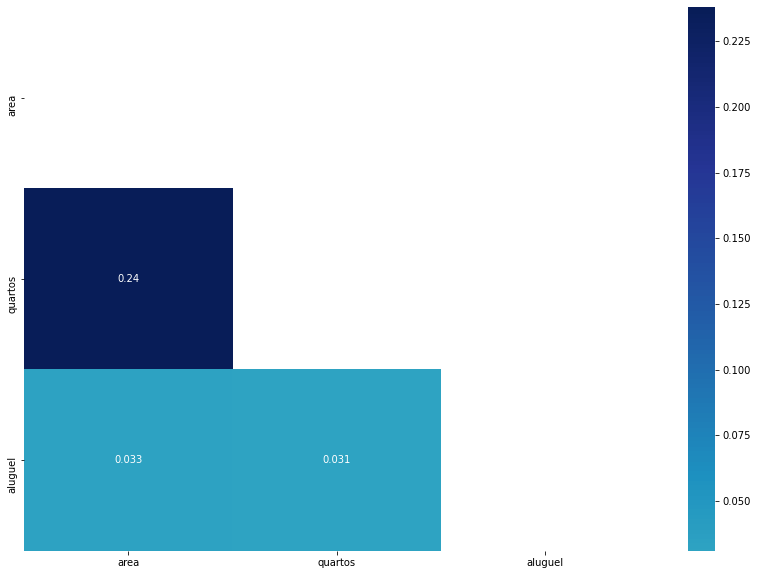

In [22]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))


sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

- Gerando algumas visualizações.

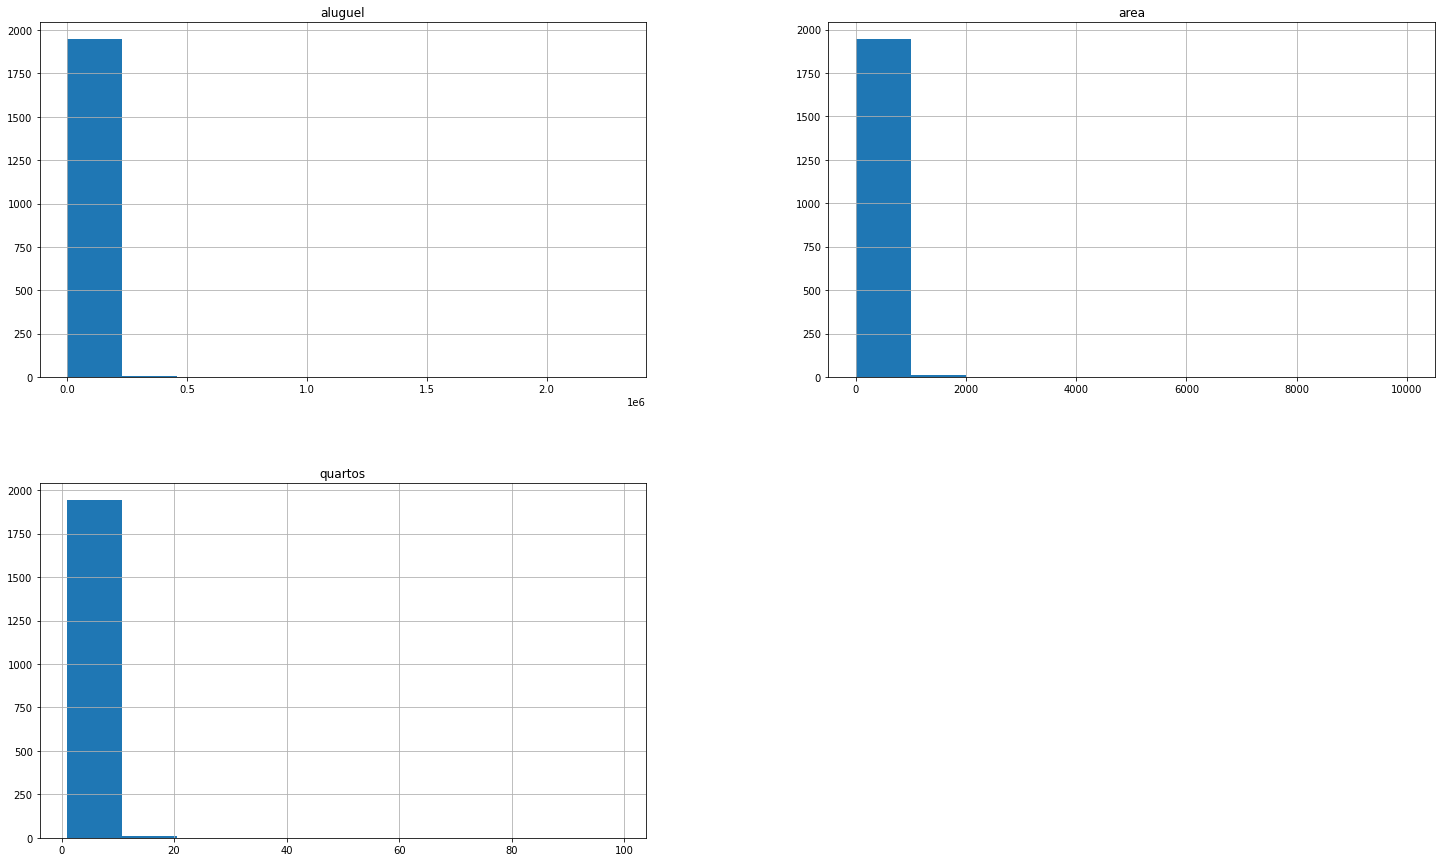

In [23]:
df.hist(figsize=(25,15))
plt.show()

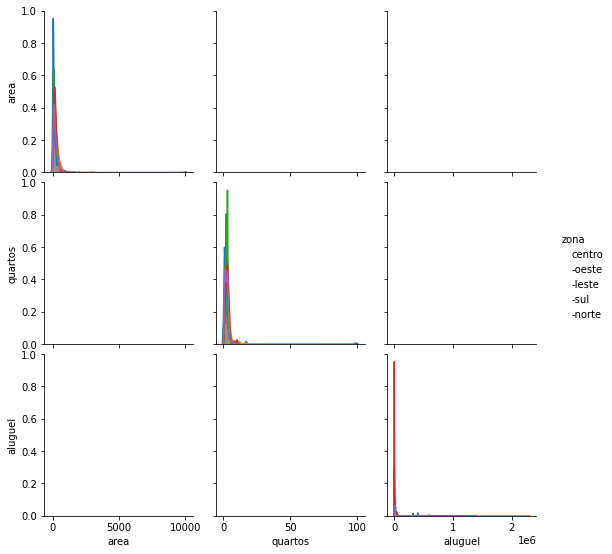

In [24]:
sns.pairplot(data = df, hue = 'zona', kind='hist')

<AxesSubplot:xlabel='area', ylabel='aluguel'>

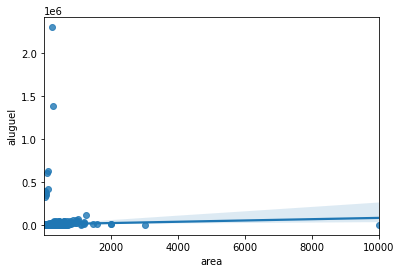

In [25]:
sns.regplot('area','aluguel', data=df)

<AxesSubplot:xlabel='zona', ylabel='aluguel'>

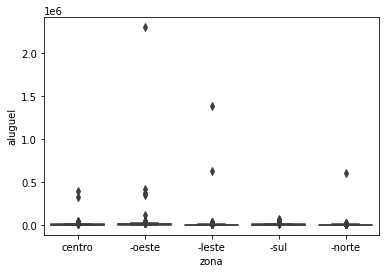

In [26]:
sns.boxplot(x='zona', y='aluguel', data=df)

<AxesSubplot:xlabel='aluguel'>

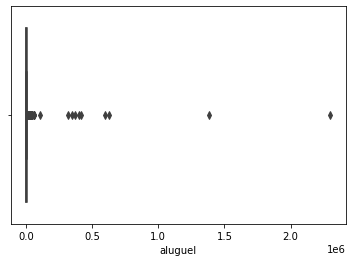

In [27]:
sns.boxplot(df['aluguel'])

<AxesSubplot:xlabel='area'>

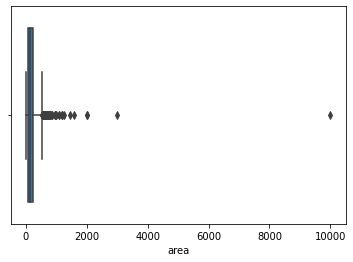

In [28]:
sns.boxplot(df['area'])

 - Tratando outliers

In [29]:
df.shape

(1956, 5)

In [30]:
df = df.query('area <= 1000 ')

<AxesSubplot:xlabel='area'>

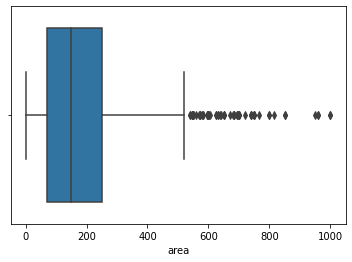

In [31]:
sns.boxplot(df['area'])

In [32]:
df = df.query('area <= 450 ')

<AxesSubplot:xlabel='area'>

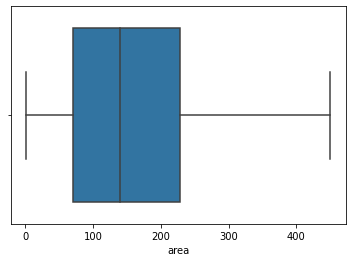

In [33]:
sns.boxplot(df['area'])

<AxesSubplot:xlabel='aluguel'>

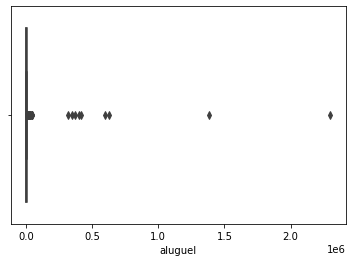

In [34]:
sns.boxplot(df['aluguel'])

In [35]:
df = df.query('aluguel <= 20000 ')

<AxesSubplot:xlabel='aluguel'>

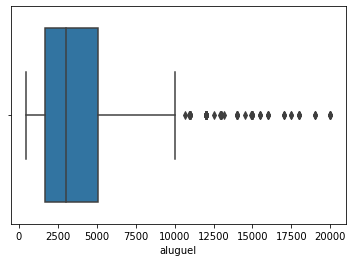

In [36]:
sns.boxplot(df['aluguel'])

array([[<AxesSubplot:title={'center':'aluguel'}>,
        <AxesSubplot:title={'center':'area'}>],
       [<AxesSubplot:title={'center':'quartos'}>, <AxesSubplot:>]],
      dtype=object)

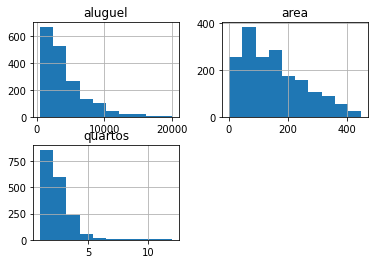

In [40]:
df.hist()

In [39]:
df.shape

(1791, 5)

In [43]:
df['zona'] = df['zona'].str.replace('-','')

 - Salvando em arquivo csv.

In [44]:
df.to_csv('dados_filtrados.csv', index=False)

In [45]:
pd.read_csv('dados_filtrados.csv')

,bairro,zona,area,quartos,aluguel
0,Bela Vista,centro,86.0,2.0,2200
1,Bela Vista,centro,35.0,1.0,3200
2,Bela Vista,centro,35.0,1.0,3700
3,Bela Vista,centro,35.0,1.0,3700
4,Bela Vista,centro,25.0,1.0,1800
...,...,...,...,...,...
1786,Carandiru,norte,180.0,3.0,3500
1787,Carandiru,norte,150.0,1.0,1550
1788,Carandiru,norte,120.0,2.0,1700
1789,Carandiru,norte,125.0,2.0,2500
